In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
from scipy import ndimage
from scipy.misc.pilutil import Image
%matplotlib inline

Text(0.5,1,'Citra yang digunakan')

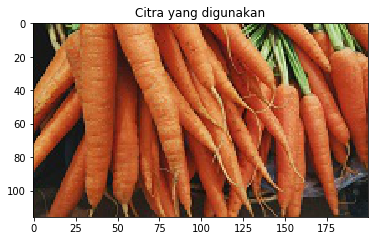

In [2]:
gambar = "D:\ITATS\Matkul\SEMESTER 6\Pengolahan Citra Digital\gambar3.jpg"
img = mpimg.imread(gambar)
plt.imshow(img)
plt.title('Citra yang digunakan')

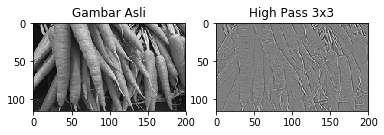

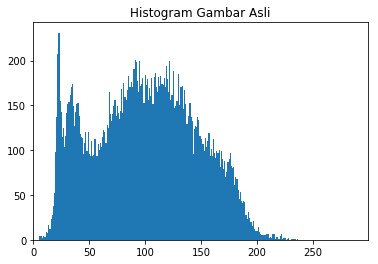

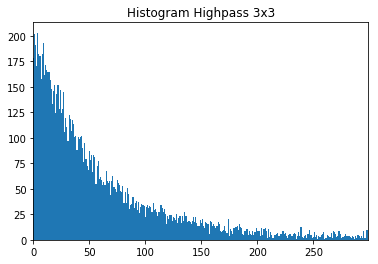

In [24]:
#Untuk nampilno citra awal
def plot(data, title):
    plot.i += 1
    plt.subplot(2, 2, plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
    
plot.i = 0
im = Image.open(gambar).convert('L')
data1 = np.array(im, dtype=int)
plot(data1, 'Gambar Asli')

kernel_awal = np.array([[-1, -1, -1],
                  [-1, 8, -1],
                  [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data1, kernel_awal)
plot(highpass_3x3, 'High Pass 3x3')
plt.show()

hist, bin_edges = scipy.histogram(data1, bins=range(300))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Gambar Asli')
plt.show()

hist, bin_edges = scipy.histogram(highpass_3x3, bins=range(300))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Highpass 3x3')
plt.show()

[[ 23.  21.  25.  23.  22.  23.  31.  32.  68.  41. 111.  45.  29.  80.
  128. 148.  80.  35.  19.  15.  43.  36.   6. 191. 176. 163. 147. 149.
  119. 124. 135. 150. 176. 156. 175. 169. 160. 152. 163. 160. 146. 140.
  142. 122. 105. 100.  73.  62. 112. 130. 119. 122. 131. 133. 139. 141.
  131. 135. 157. 166. 176. 184. 172. 178. 179. 177. 183. 165. 151. 145.
   80.  66.  68.  64.  65.  58.  54.  62.  56.  65.  68.  83.  83.  99.
  113. 118. 137. 145. 144. 146. 169. 181. 187. 191. 182. 180. 173. 183.
   43.  36.  39.  60.  74.  72.  81.  77.  86.  85.  91.  98. 111. 155.
  192. 181. 171. 180. 192. 196. 183. 184. 185. 173.  83.  68. 105.  92.
   23.  21.  27.  16.  46.  85.  66.  30.  33.  44.  23.  42.  27.  42.
   21.  32.  57.  75.  83.  84.  95. 101. 104. 117. 132. 132. 144. 145.
  165. 198. 192. 193. 197. 182.  80.  75.  59.  21.  24.  23.  46. 159.
  183. 196. 201. 122.  32.  60. 162. 162. 192. 212. 190. 145. 202. 117.
  146. 167. 110. 106.  30.  27.  76. 105. 115. 116. 119. 127. 13

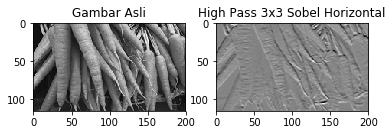

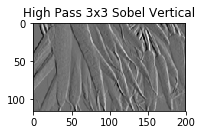

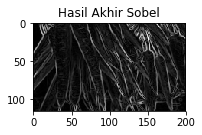

[[  8.           6.32455532   8.94427191  10.19803903   1.41421356
   33.37663854  37.65634077 134.64768843  56.30275304 192.84190416
   62.76941931 332.34319611 100.56838469 385.68640111 291.38634148
  173.66634677 449.67766233 252.21022977 101.19288513 199.48433522
  139.97856979 170.88007491 595.89260777 648.04938083  98.50888285
  100.43903624  67.94115101 137.31715115 108.          75.05997602
  137.2661648  154.32433379  26.07680962  11.66190379  34.17601498
   70.71067812  76.94153625  34.66987165  38.83297568  61.6116872
   89.10667764  31.40063694  73.38937253 163.57261384  78.
  113.00442469 158.31613942 139.6065901  269.28423645  50.11985634
   22.09072203  36.          42.04759208  44.92215489  50.
   56.32051136 108.01851693 150.         129.32130528  99.80981916
   73.75635566  35.35533906  40.71854614  35.77708764  18.97366596
   17.20465053  38.07886553 116.84177335  82.28000972 277.2002886
  325.26911935  70.88018059  11.40175425  17.49285568  24.16609195
   35.0142828

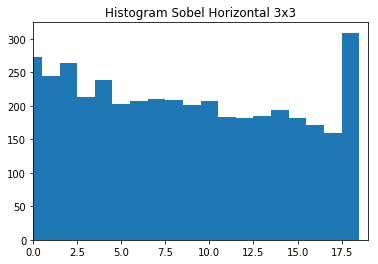

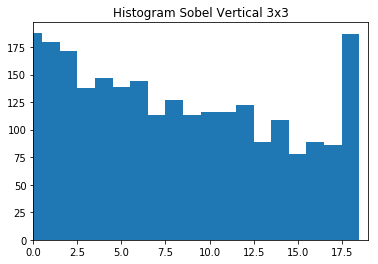

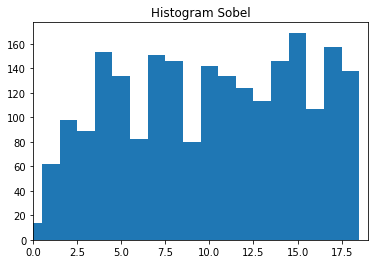

In [46]:
#Sobel
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
    
plot.i = 0
im = Image.open(gambar).convert('L')
data2 = np.array(im, dtype=float)
plot(data2, 'Gambar Asli')
np.set_printoptions(threshold=np.inf)
print(data2, "Matriks Citra Asli")

kernel_sobel_1 = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]])
hsobel_3x3 = ndimage.convolve(data2, kernel_sobel_1)
plot(hsobel_3x3, 'High Pass 3x3 Sobel Horizontal')
plt.show()

kernel_sobel_2 = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
vsobel_3x3 = ndimage.convolve(data2, kernel_sobel_2)
plot(vsobel_3x3, 'High Pass 3x3 Sobel Vertical')
plt.show()


hvsobel_3x3 = np.sqrt(abs(hsobel_3x3**2) + abs(vsobel_3x3**2))
plot(hvsobel_3x3, "Hasil Akhir Sobel")
plt.show()
np.set_printoptions(threshold=np.inf)
print(hvsobel_3x3, "Matriks Sobel")

hist, bin_edges = scipy.histogram(hsobel_3x3, bins=range(20))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Sobel Horizontal 3x3')
plt.show()

hist, bin_edges = scipy.histogram(vsobel_3x3, bins=range(20))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Sobel Vertical 3x3')
plt.show()

hist, bin_edges = scipy.histogram(hvsobel_3x3, bins=range(20))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Sobel')
plt.show()

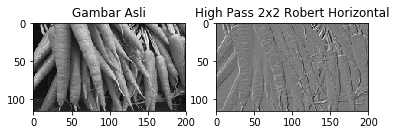

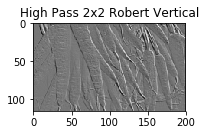

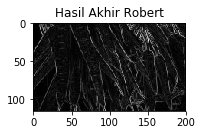

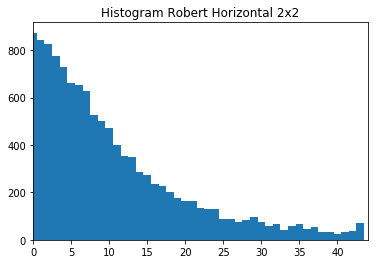

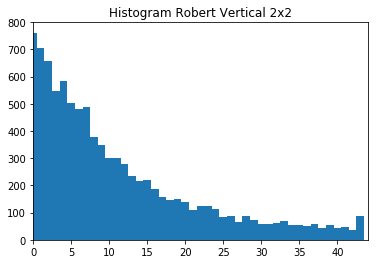

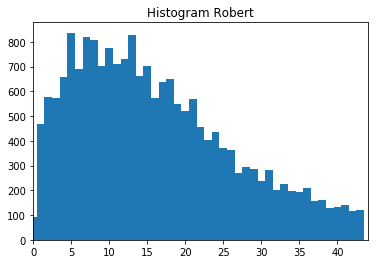

In [43]:
#Robert
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

im = Image.open(gambar).convert('L')
data3 = np.array(im, dtype=float)
plot(data3, 'Gambar Asli')

kernel_robert_1 = np.array([[1, 0],
                          [0, -1]
                         ])
hrobert_2x2 = ndimage.convolve(data3, kernel_robert_1)
plot(hrobert_2x2, 'High Pass 2x2 Robert Horizontal')
plt.show()

kernel_robert_2 = np.array([[0, 1],
                            [-1,0]])
vrobert_2x2 = ndimage.convolve(data3, kernel_robert_2)
plot(vrobert_2x2, 'High Pass 2x2 Robert Vertical')
plt.show()

hvrobert_2x2 = np.sqrt(abs(hrobert_2x2)**2 + abs(vrobert_2x2)**2)
plot(hvrobert_2x2, 'Hasil Akhir Robert')
plt.show()
#print(hvrobert_2x2)

hist, bin_edges = scipy.histogram(hrobert_2x2, bins=range(45))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Robert Horizontal 2x2')
plt.show()

hist, bin_edges = scipy.histogram(vrobert_2x2, bins=range(45))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Robert Vertical 2x2')
plt.show()

hist, bin_edges = scipy.histogram(hvrobert_2x2, bins=range(45))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Robert')
plt.show()

# Hasil Keseluruhan

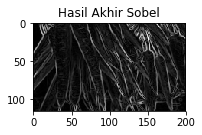

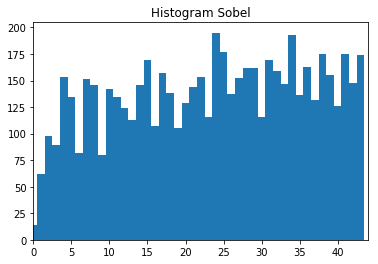

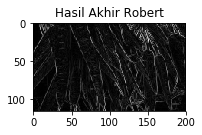

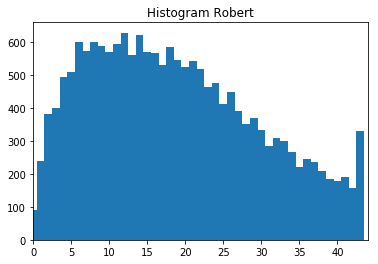

In [44]:
def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)
plot.i = 0

#Sobel
hvsobel_3x3 = np.sqrt(hsobel_3x3**2 + vsobel_3x3**2)
plot(hvsobel_3x3, "Hasil Akhir Sobel")
plt.show()

hist, bin_edges = scipy.histogram(hvsobel_3x3, bins=range(45))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Sobel')
plt.show()


#Robert
hvrobert_2x2 = abs(hrobert_2x2) + abs(vrobert_2x2)
plot(hvrobert_2x2, 'Hasil Akhir Robert')
plt.show()

hist, bin_edges = scipy.histogram(hvrobert_2x2, bins=range(45))
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Histogram Robert')
plt.show()